In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer


trump = pd.read_json("preprocessingDoneRight.json")
obama = pd.read_csv("obamaprocessed.csv")

In [2]:
print(len(trump),len(obama))

36159 18469


In [3]:
obama.columns

Index(['Unnamed: 0', 'text', 'date_year', 'week_year', 'date_month',
       'modded_text', 'modded1', 'noTags_punct', 'modded1_stemmed'],
      dtype='object')

In [4]:
trump.columns

Index(['in_reply_to_user_id_str', 'is_retweet', 'text', 'month', 'year',
       'hour', 'week_year', 'date', 'modded_text', 'modded1', 'noTags_punct',
       'modded1_stemmed'],
      dtype='object')

Corpus length in words: 383701
[('realdonaldtrump', 8369), ('great', 5236), ('trump', 4760), ('thank', 2372), ('president', 2293), ('people', 2076), ('thanks', 2022), ('us', 1809), ('donald', 1729), ('get', 1610), ('would', 1590), ('country', 1542), ('new', 1524), ('america', 1516), ('obama', 1460), ('like', 1399), ('time', 1353), ('make', 1340), ('good', 1331), ('one', 1313)]


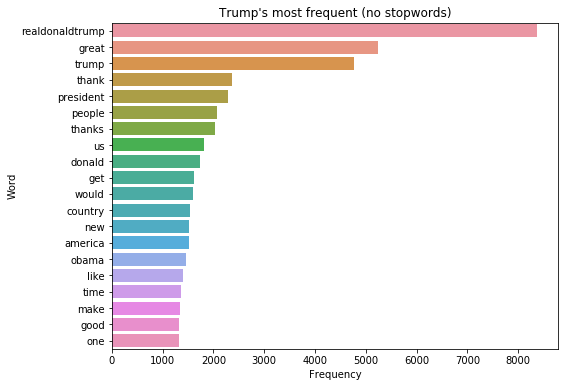

Corpus length in words: 189712


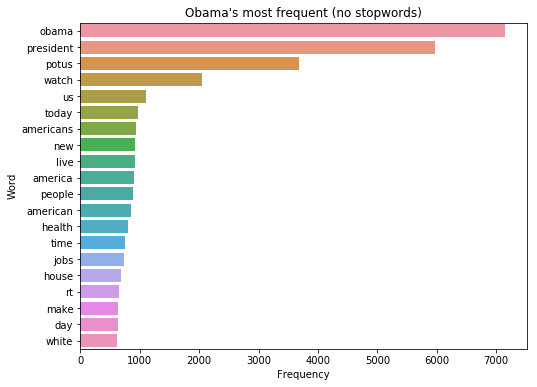

In [5]:
sentences = trump["modded1"].tolist()

fullText = " ".join(sentences)
text_in_words = [w for w in fullText.split(' ') if w.strip() != '' or w == '\n']
print('Corpus length in words:', len(text_in_words))
word_freq = dict(Counter(fullText.split()))
word_freq = sorted(word_freq.items(), key=lambda pair: pair[1], reverse=True)[0:20]
print(word_freq)

weights = [x for (y,x) in word_freq]
words = [y for (y,x) in word_freq]

fig = plt.figure(figsize=(8,6))
plt.title("Trump's most frequent (no stopwords)")
sns.barplot(x=weights, y=words,figure=fig)
plt.xlabel("Frequency",figure=fig)
plt.ylabel("Word",figure=fig)
plt.show()

sentences = obama["modded1"].tolist()

fullText = " ".join(sentences)
text_in_words = [w for w in fullText.split(' ') if w.strip() != '' or w == '\n']
print('Corpus length in words:', len(text_in_words))

word_freq = dict(Counter(fullText.split()))
word_freq = sorted(word_freq.items(), key=lambda pair: pair[1], reverse=True)[0:20]

weights = [x for (y,x) in word_freq]
words = [y for (y,x) in word_freq]

fig = plt.figure(figsize=(8,6))
plt.title("Obama's most frequent (no stopwords)")
sns.barplot(x=weights, y=words,figure=fig)
plt.xlabel("Frequency",figure=fig)
plt.ylabel("Word",figure=fig)
plt.show()     


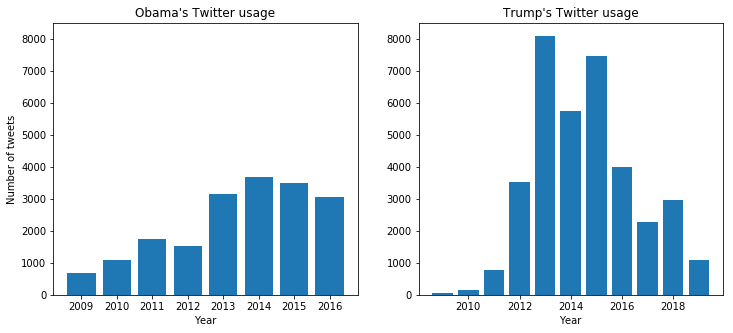

In [6]:
time = obama.groupby(["date_year"])["text"].count()
plt.figure(figsize=(12,5))

ax = plt.subplot(121)
plt.title("Obama's Twitter usage")
plt.ylabel("Number of tweets")
plt.xlabel("Year")
plt.bar(time.index, time )

plt.subplot(122,sharey = ax)
time = trump.groupby(["year"])["text"].count()
plt.title("Trump's Twitter usage")
plt.bar(time.index, time )
plt.xlabel("Year")

plt.show()

[ 697 1097 1738 1543 3154 3685 3506 3049]


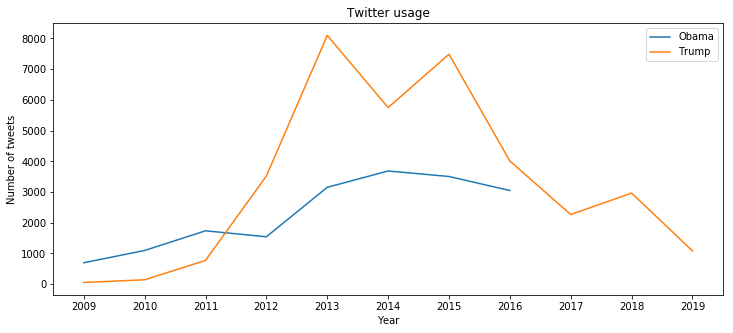

In [7]:
time = obama.groupby(["date_year"])["text"].count()
time1 = trump.groupby(["year"])["text"].count()
print(time.values)
#time = time.values 
#time = np.append(time,[0,0,0])


plt.figure(figsize=(12,5))
plt.title("Twitter usage")
plt.ylabel("Number of tweets")
plt.xlabel("Year")
plt.plot(time.index, time )
plt.plot(time1.index,time1)
plt.xticks(time1.index)
plt.legend(labels=["Obama","Trump"])
plt.show()

In [8]:
vader = SentimentIntensityAnalyzer()
text = obama["text"].tolist()
scores = list()
positive = list()
negative = list()
neut = list()
for t in text:
    scores.append(vader.polarity_scores(t)['compound'])
    positive.append(vader.polarity_scores(t)['pos'])
    negative.append(vader.polarity_scores(t)['neg'])
    neut.append(vader.polarity_scores(t)['neu'])
obama["vaderScore"] = scores

In [9]:
vader = SentimentIntensityAnalyzer()
text = trump["text"].tolist()
scores = list()
positive = list()
negative = list()
neut = list()
for t in text:
    scores.append(vader.polarity_scores(t)['compound'])
    positive.append(vader.polarity_scores(t)['pos'])
    negative.append(vader.polarity_scores(t)['neg'])
    neut.append(vader.polarity_scores(t)['neu'])
trump["vaderScore"] = scores

In [10]:

obama["vaderScoreBinned"] = pd.cut(obama["vaderScore"],  [-1,-0.05,0.05,1], labels=["negative", "neutral", "positive"])

t1 = obama.groupby(["vaderScoreBinned"])["text"].count()
plt.figure(figsize=(7,5))
plt.title("Obama binned vader scores")
plt.ylabel("Number of tweets")
plt.xlabel("Bins")
plt.bar(t1.index, t1,label=["Negative","Neutral","Positive"] )
plt.show()

NameError: name 'c' is not defined

In [ ]:
plt.figure(figsize=(12,5))
ax = plt.subplot(121)
plt.title("Obama's sentiment polarity")
plt.ylabel("Tweet Frequency")
plt.xlabel("Vader score")
plt.hist(obama["vaderScore"])
         
plt.subplot(122,sharey = ax)
plt.title("Trump's sentiment polarity")
plt.hist(trump["vaderScore"])
plt.xlabel("Vader score")

plt.show()

In [12]:
def applyVader(data):
    vader = SentimentIntensityAnalyzer()
    text = data["text"].tolist()
    scores = list()
    positive = list()
    negative = list()
    neut = list()
    for t in text:
        scores.append(vader.polarity_scores(t)['compound'])
        positive.append(vader.polarity_scores(t)['pos'])
        negative.append(vader.polarity_scores(t)['neg'])
        neut.append(vader.polarity_scores(t)['neu'])
    data["vaderScore"] = scores
    data = data[data["is_retweet"] == False]
    data["vaderScoreBinned"] = pd.cut(data["vaderScore"], [-1,-0.05,0.05,1], labels=["negative", "neutral", "positive"])
    data.rename(index=str, columns={"year": "date_year"},inplace=True)
    data.rename(index=str, columns={"month": "date_month"},inplace=True)
    data.drop(["date_month","hour","in_reply_to_user_id_str","is_retweet","modded_text","modded1","date","week_year"],axis=1,inplace=True)
    data.corr()
    return data

def applyVader1(data):
    vader = SentimentIntensityAnalyzer()
    text = data["text"].tolist()
    scores = list()
    positive = list()
    negative = list()
    neut = list()
    for t in text:
        scores.append(vader.polarity_scores(t)['compound'])
        positive.append(vader.polarity_scores(t)['pos'])
        negative.append(vader.polarity_scores(t)['neg'])
        neut.append(vader.polarity_scores(t)['neu'])
    data["vaderScore"] = scores
    data["vaderScoreBinned"] = pd.cut(data["vaderScore"], [-1,-0.05,0.05,1], labels=["negative", "neutral", "positive"])
    data.rename(index=str, columns={"year": "date_year"},inplace=True)
    data.rename(index=str, columns={"month": "date_month"},inplace=True)
    data.drop(['Unnamed: 0','week_year', 'date_month',
       'modded_text', 'modded1','modded1_stemmed'],axis=1,inplace=True)
    data.corr()
    return data

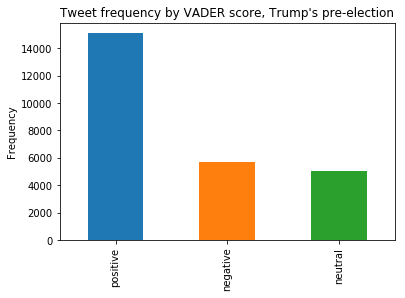

In [20]:
pre = trump[trump["year"] < 2016]
pre = pre[pre["year"] > 2009]


plt.title("Tweet frequency by VADER score, Trump's pre-election")
plt.ylabel("Frequency")
toplot = applyVader(pre)
toplot["vaderScoreBinned"].value_counts().plot(kind="bar")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


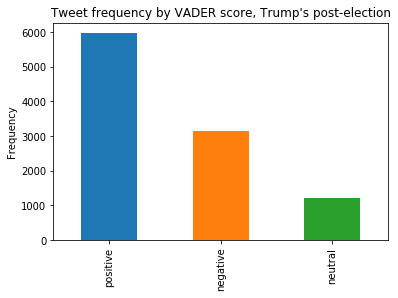

In [21]:
post = trump[trump["year"] >= 2016]


plt.title("Tweet frequency by VADER score, Trump's post-election")
plt.ylabel("Frequency")
toplot = applyVader(post)
toplot["vaderScoreBinned"].value_counts().plot(kind="bar")

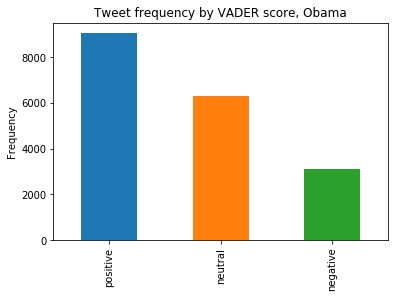

In [15]:
plt.title("Tweet frequency by VADER score, Obama")
plt.ylabel("Frequency")
toplot = applyVader1(obama)
toplot["vaderScoreBinned"].value_counts().plot(kind="bar")